# Imports

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn import metrics
import numpy as np
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import math
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegressionCV

# Read in data

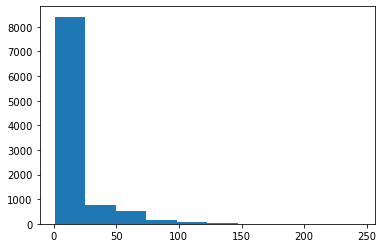

0.25    1.0
0.50    2.0
0.75    8.0
Name: plays, dtype: float64


In [39]:
data = pd.read_csv("tracks_norm_1hot.csv", encoding='latin-1')
#data = data.drop(columns = ['Unnamed: 0', 'artist', 'track', 'spotify_id', 'time_signature', 'duration', 'key', 'mode'])

# add in column of ones, the bias
data.insert(0, 'Ones', 1)


plt.hist(data['plays'])
plt.show()

print(data['plays'].quantile([0.25,0.5,0.75]))

# so set 8 as the cutoff for liked/disliked

In [40]:
len(data.columns)

34

## Created "liked" column

In [3]:
# 1 = liked, 0 = disliked
liked = []

plays = list(data['plays'])

for entry in plays:
    if entry >= 8:
        liked.append(1)
    else:
        liked.append(0)
        
data['liked'] = liked

data

,Ones,artist,track,plays,danceability,energy,loudness,speechiness,acousticness,instrumentalness,...,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#
0,1,$uicideboy$,"10,000 DEGREES",1,0.406955,0.340037,-0.419410,0.728624,-0.735698,-0.392784,...,0,0,1,0,0,0,0,0,0,0
1,1,$uicideboy$,122 DAYS,1,0.758045,-1.386186,-1.783945,1.918486,0.763985,-0.392755,...,0,0,0,0,0,0,0,1,0,0
2,1,$uicideboy$,BRING OUT YOUR DEAD,1,1.359914,1.259326,-0.337163,1.005715,-0.728734,-0.392784,...,0,0,1,0,0,0,0,0,0,0
3,1,$uicideboy$,FUCKALLOFYOU2K18,1,0.939860,0.360465,-0.013417,1.201309,-0.805420,-0.392776,...,0,0,0,0,0,0,0,0,0,1
4,1,$uicideboy$,KING TULIP,1,-0.270148,-0.390288,-0.739016,2.627514,-0.276817,-0.392784,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10004,1,Future,Oxy (feat. Lil Wayne),1,1.153022,-0.645647,-0.067789,0.280388,-0.788357,-0.128890,...,0,0,0,0,0,0,0,0,0,1
10005,1,Huncho Jack,Saint,55,1.497842,-0.022572,0.850733,-0.589189,-0.783676,-0.392784,...,0,0,1,0,0,0,0,0,0,0
10006,1,Migos,Kelly Price (feat. Travis Scott),2,0.739237,0.166393,0.291837,-0.776633,1.232152,-0.392784,...,0,0,0,0,0,1,0,0,0,0
10007,1,slushii,So Long (feat. Madi),7,0.532344,0.380894,0.424316,-0.736700,0.199089,-0.391728,...,0,0,0,0,0,1,0,0,0,0


## Create training/testing sets 

X = data.drop(columns = ['liked', 'plays','artist','track'])
y = data['liked']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Log Reg model with Ridge Regularization 

weights = {1:4, 0:1}
logModl2 = LogisticRegression(max_iter = 5000, class_weight = weights, penalty='l2')
logModl2.fit(X_train, y_train)
predictionsl2 = logModl2.predict(X_test)

In [34]:
confMatrix = confusion_matrix(y_test, predictionsl2)
confDF = pd.DataFrame(confMatrix)
confDF

,0,1
0,367,1102
1,77,456


## Model results 

In [35]:
TP = confMatrix[1, 1]
TN = confMatrix[0, 0]
FP = confMatrix[0, 1]
FN = confMatrix[1, 0]

# use float to perform true division, not integer division
print("Accuracy = ", (TP + TN) / float(TP + TN + FP + FN))

sensitivity = TP / float(FN + TP)
print("sensitivity = ",sensitivity)

specificity = TN / (TN + FP)

print("specificity = ",specificity)

false_positive_rate = FP / float(TN + FP)

print("false_positive_rate = ",false_positive_rate)

if TP + FP == 0:
    precision = 0
else: 
    precision = TP / float(TP + FP)

print("precision = ", precision)

print("recall = ", sensitivity)

Accuracy =  0.4110889110889111
sensitivity =  0.8555347091932458
specificity =  0.2498298162014976
false_positive_rate =  0.7501701837985024
precision =  0.2926829268292683
recall =  0.8555347091932458


# Log Reg model with no regularization

In [36]:
logModNone = LogisticRegression(max_iter = 5000, class_weight = weights, penalty='none')
logModNone.fit(X_train, y_train)
predictionsNone = logModNone.predict(X_test)

In [37]:
confMatrix = confusion_matrix(y_test, predictionsNone)
confDF = pd.DataFrame(confMatrix)
confDF

,0,1
0,365,1104
1,77,456


## Model results 

In [38]:
TP = confMatrix[1, 1]
TN = confMatrix[0, 0]
FP = confMatrix[0, 1]
FN = confMatrix[1, 0]

# use float to perform true division, not integer division
print("Accuracy = ", (TP + TN) / float(TP + TN + FP + FN))

sensitivity = TP / float(FN + TP)
print("sensitivity = ",sensitivity)

specificity = TN / (TN + FP)

print("specificity = ",specificity)

false_positive_rate = FP / float(TN + FP)

print("false_positive_rate = ",false_positive_rate)

if TP + FP == 0:
    precision = 0
else: 
    precision = TP / float(TP + FP)

print("precision = ", precision)

print("recall = ", sensitivity)

Accuracy =  0.4100899100899101
sensitivity =  0.8555347091932458
specificity =  0.24846834581347857
false_positive_rate =  0.7515316541865215
precision =  0.2923076923076923
recall =  0.8555347091932458


# Log Reg model with regularization and PCA

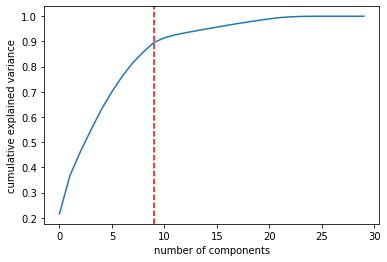

In [9]:
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(9, color='red', linestyle='dashed')
plt.show()
# based on this, use 9 PCs

In [10]:
# Train the PCA model 
pca_final = PCA(n_components=9)
df_train_pca = pca_final.fit_transform(X_train)

## Fit model to dataset of 9 PCs 

In [41]:
# Apply PCA model to the test data
df_test_pca = pca_final.transform(X_test)
 
# Train the Logistic Regression model
LR_PCA_Learner = LogisticRegressionCV(cv=10, random_state=1, class_weight = weights, max_iter = 5000, penalty = 'l2')
LR_PCA_Model = LR_PCA_Learner.fit(df_train_pca, y_train)

In [42]:
predictionsPCA = LR_PCA_Model.predict(df_test_pca)
confMatrix = confusion_matrix(y_test, predictionsPCA)
confDF = pd.DataFrame(confMatrix)
confDF

,0,1
0,332,1137
1,69,464


## Model results 

In [43]:
TP = confMatrix[1, 1]
TN = confMatrix[0, 0]
FP = confMatrix[0, 1]
FN = confMatrix[1, 0]

# use float to perform true division, not integer division
print("Accuracy = ", (TP + TN) / float(TP + TN + FP + FN))

sensitivity = TP / float(FN + TP)
print("sensitivity = ",sensitivity)

specificity = TN / (TN + FP)

print("specificity = ",specificity)

false_positive_rate = FP / float(TN + FP)

print("false_positive_rate = ",false_positive_rate)

# avoid dividing by 0
if TP + FP == 0:
    precision = 0
else: 
    precision = TP / float(TP + FP)

print("precision = ", precision)

print("recall = ", sensitivity)

Accuracy =  0.39760239760239763
sensitivity =  0.8705440900562852
specificity =  0.22600408441116407
false_positive_rate =  0.773995915588836
precision =  0.28981886321049344
recall =  0.8705440900562852
